In [1]:
# -*- coding : utf8 -*-

import os
import json
import re
from textblob_de import TextBlobDE as t
import matplotlib.pyplot as plt
from utils import _flatten_list

from textblob_de.taggers import PatternTagger

In [2]:
dict1 = {}
# Listen definieren
# Christian Drosten
cd = []
lencd = []
wtypecd = {}
countercd = 0
avglencd = 0
# Sandra Ciesek
sc = []
lensc = []
wtypesc = {}
countersc = 0
avglensc = 0
# Korinna Hennig
kh = []
lenkh = []
wtypekh = {}
counterkh = 0
avglenkh = 0
# Anja Martini
am = []
lenam = []
wtypeam = {}
counteram = 0
avglenam = 0
# Beke Schulmann
bs = []
lenbs = []
wtypebs = {}
counterbs = 0
avglenbs = 0
# Iterator
people = ['cd','sc','kh','am','bs']
mods = ['kh','am','bs']
scientist = ['cd','sc']

In [3]:
pathndr = os.path.join('data','REFINED','ndr')
ldndr = os.listdir(pathndr)

In [4]:
for i in range(0,len(ldndr)):
    path = os.path.join(pathndr,ldndr[i])
    if i!=174 and i!=154 and re.search('.json',ldndr[i]):
        with open(path,'r',encoding='utf-8') as f:
            dict1 = json.load(f)
            for i in dict1['metadata']['speakers']:
                if 'Christian Drosten' in dict1['metadata']['speakers']:
                    countercd += 1
                if 'Sandra Ciesek' in dict1['metadata']['speakers']:
                    countersc += 1
                if 'Korinna Hennig' in dict1['metadata']['speakers']:
                    counterkh += 1
                if 'Anja Martini' in dict1['metadata']['speakers']:
                    counteram += 1
                if 'Beke Schulmann' in dict1['metadata']['speakers']:
                    counterbs += 1  
            for key in dict1['content']:
                if dict1['content'][key][0]=='Christian Drosten':
                    cd.append(dict1['content'][key][1])
                if dict1['content'][key][0]=='Sandra Ciesek':
                    sc.append(dict1['content'][key][1])
                if dict1['content'][key][0]=='Korinna Hennig':
                    kh.append(dict1['content'][key][1])
                if dict1['content'][key][0]=='Anja Martini':
                    am.append(dict1['content'][key][1])
                if dict1['content'][key][0]=='Beke Schulmann':
                    bs.append(dict1['content'][key][1])

In [5]:
    l = []
    if len(cd)>1:
        l = ' '.join(cd).split(' ') 
        l = _flatten_list(l)
        lencd = len(l)
    l = []
    if len(sc)>1:
        l = ' '.join(sc).split(' ') 
        l = _flatten_list(l)
        lensc = len(l)
        
    l = []
    if len(kh)>1:
        l = ' '.join(kh).split(' ') 
        l = _flatten_list(l)
        lenkh = len(l)
    l = []
    if len(am)>1:
        l = ' '.join(am).split(' ')
        l = _flatten_list(l)
        lenam = len(l)
    l = []
    if len(bs)>1:
        l = ' '.join(bs).split(' ')
        l = _flatten_list(l)
        lenbs = len(l)

In [6]:
#Durchschnittliche Redelänge
# Christian Drosten
if countercd>1:
    avglencd = lencd/countercd
# Sandra Ciesek
if countersc>1:
    avglensc = lensc/countersc
# Korinna Hennig
if counterkh>1:
    avglenkh = lenkh/counterkh
# Anja Martini
if counteram>1:
    avglenam = lenam/counteram
# Beke Schulmann
if counterbs>1:
    avglenbs = lenbs/counterbs

In [7]:
# Gesamten Text für alle Personen zusammenjoinen
tcd = "\n".join(cd)
tsc = "\n".join(sc)
tkh = "\n".join(kh)
tam = "\n".join(am)
tbs = "\n".join(bs)

[15478.666666666666, 18856.565217391304, 4577.83660130719, 1403.3823529411766, 4365.8] ['Christian Drosten', 'Sandra Ciesek', 'Korinna Hennig', 'Anja Martini', 'Beke Schulmann']


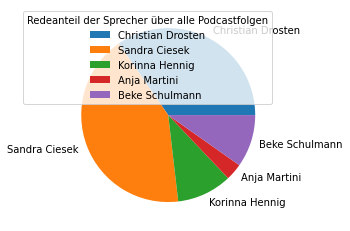

In [8]:
# Instanz des Taggers erzeugen 
tagger = PatternTagger()
# Nomen, Adjektive/Adverb, Verben https://pythonexamples.org/nltk-pos-tagging/
# Nomen und Verben / Satz

# Summe Worte
wcd = []
wsc = []
wkh = []
wam = []
wbs = []
# Worttypen
wtcd = []
wtsc = []
wtkh = []
wtam = []
wtbs = []
# Anteil Worttyp/Summe Worte
partswcd = {}
partswsc = {}
partswkh = {}
partswam = {}
partswbs = {}
# Worttypen Anzahl gesamt 
for i in range(0,len(scientist)):
    if scientist[i]=='cd':
        blob = t(tcd,pos_tagger=tagger)
        for tag in blob.pos_tags:
            key = tag[1]
            if key in wtypecd:
                wtypecd[key] += 1
            else:
                wtypecd[key] = 1
        for key in wtypecd:
            wcd.append(wtypecd[key])
            wtcd.append(key)
        sumwcd = sum(wcd) # Summe aller Wörter
    if scientist[i]=='sc':
        blob = t(tsc,pos_tagger=tagger)
        for tag in blob.pos_tags:
            key = tag[1]
            if key in wtypesc:
                wtypesc[key] += 1
            else:
                wtypesc[key] = 1
        for key in wtypesc:
            wsc.append(wtypesc[key])
            wtsc.append(key)
        sumwsc = sum(wsc) # Summe aller Wörter
        
for i in range(0,len(mods)):
    if mods[i]=='kh':
        blob = t(tkh,pos_tagger=tagger)
        for tag in blob.pos_tags:
            key = tag[1]
            if key in wtypekh:
                wtypekh[key] += 1
            else:
                wtypekh[key] = 1
        for key in wtypekh:
            wkh.append(wtypekh[key])
            wtkh.append(key)
        sumwkh = sum(wkh) # Summe aller Wörter
    if mods[i]=='am':
        blob = t(tam,pos_tagger=tagger)
        for tag in blob.pos_tags:
            key = tag[1]
            if key in wtypeam:
                wtypeam[key] += 1
            else:
                wtypeam[key] = 1
        for key in wtypeam:
            wam.append(wtypeam[key])
            wtam.append(key)
        sumwam = sum(wam) # Summe aller Wörter
    if mods[i]=='bs':
        blob = t(tbs,pos_tagger=tagger)
        for tag in blob.pos_tags:
            key = tag[1]
            if key in wtypebs:
                wtypebs[key] += 1
            else:
                wtypebs[key] = 1
        for key in wtypebs:
            wbs.append(wtypebs[key])
            wtbs.append(key)
        sumwbs = sum(wbs) # Summe aller Wörter

# drosten
for key in wtypecd:
    nv = wtypecd[key]/countercd
    partswcd.update({key:nv})
# ciesek
for key in wtypesc:
    nv = wtypesc[key]/countersc
    partswsc.update({key:nv})
# hennig
for key in wtypekh:
    nv = wtypekh[key]/counterkh
    partswkh.update({key:nv})
# martini
for key in wtypeam:
    nv = wtypeam[key]/counteram
    partswam.update({key:nv})
# schulmann
for key in wtypebs:
    nv = wtypebs[key]/counterbs
    partswbs.update({key:nv})

# Ergebnisdoc erzeugen
textdrosten = 'Drosten:\nDurchschnittliche Redelänge: '+str(avglencd)+'\nVerwendete Worttypen: '+str(wtcd)+'\nSo häufig verwendet Drosten...: '+str(wtypecd)+'\nalso anteilig...:'+str(partswcd)
textciesek = 'Ciesek:\nDurchschnittliche Redelänge: '+str(avglensc)+'\nVerwendete Worttypen: '+str(wtsc)+'\nSo häufig verwendet Ciesek...: '+str(wtypesc)+'\nalso anteilig...:'+str(partswsc)
texthennig = 'Hennig:\nDurchschnittliche Redelänge: '+str(avglenkh)+'\nVerwendete Worttypen: '+str(wtkh)+'\nSo häufig verwendet Hennig...: '+str(wtypekh)+'\nalso anteilig...:'+str(partswkh)
textmartini = 'Martini:\nDurchschnittliche Redelänge: '+str(avglenam)+'\nVerwendete Worttypen: '+str(wtam)+'\nSo häufig verwendet Martini...: '+str(wtypeam)+'\nalso anteilig...:'+str(partswam)
textschulmann = 'Schulmann:\nDurchschnittliche Redelänge: '+str(avglenbs)+'\nVerwendete Worttypen: '+str(wtbs)+'\nSo häufig verwendet Schulmann...: '+str(wtypebs)+'\nalso anteilig...:'+str(partswbs)

result = textdrosten + '\n' + textciesek + '\n' + texthennig + '\n' + textmartini + '\n' + textschulmann
uh = re.sub('UH','Interjektion',result)
nn = re.sub("NN|NNP|NNS","Nomen",uh)
cdw = re.sub('CD','Kardinalziffer',nn)
vb = re.sub('VB|VBN','Verb',cdw)
cc = re.sub('CC','Konjunktion',vb)
inw = re.sub('IN','Präposition',cc)
jj = re.sub('JJ','Adjektiv',inw)
prp = re.sub('PRP$','Possesivpronomen',jj)
prp = re.sub('PRP','Personalpronomen',jj)
rp = re.sub('RP','Partizip',prp)
w = re.sub('WP|WDT|WP$|WRB','Wessen/Wer/Was/Wo/Wann',rp)
rb = re.sub('RB','Adverb',w)
dt = re.sub('DT','Bestimmungswort',rb)
to = re.sub('TO','Zu',dt)
md = re.sub('MD','Modal',to)
fw = re.sub('FW','Fremdwort',md)
ls = re.sub('LS','Listenmarker',fw)
endresult = ls

pathstats = os.path.join('data','STATS')
with open(os.path.join(pathstats,"results_textstats_ndr.txt"),"w",encoding="utf-8") as f:
    f.write(endresult)

# Piechart Redeanteil
avglen = [avglencd,avglensc,avglenkh,avglenam,avglenbs]
label = ['Christian Drosten','Sandra Ciesek','Korinna Hennig','Anja Martini','Beke Schulmann']
print(avglen,label)

plt.pie(avglen,labels=label)
plt.legend(title="Redeanteil der Sprecher über alle Podcastfolgen")
plt.savefig("RedeanteilNDR.svg")